In [1]:
import pandas as panda 
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
#Leser inn csv filen og setter opp en delimiter så den blir lesbar
dataframe = panda.read_csv('Ruter_data.csv',delimiter=';')
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [3]:
timedeltaplanlagt = panda.to_timedelta(dataframe['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])

In [4]:
timedeltafaktisk = panda.to_timedelta(dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')

In [5]:
#Her lager jeg en ny kolonne hvor jeg har kalkulert differansen mellom faktisk og planlagt ankomst i sekunder
dataframe['Differanse_ankomst'] = panda.to_timedelta(timedeltafaktisk - timedeltaplanlagt) / np.timedelta64(1,'s')

In [6]:
#Her finner jeg alle null verdiene i tabellen
nullvalues = dataframe[dataframe.isna().any(axis=1)]

In [7]:
#Her printer jeg radene som inneholder nullverdiene
nullvalues

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Differanse_ankomst
245,30009-2020-07-10T10:10:00+02:00,10/07/2020,Oslo,Nordøst,Stovner,Folkvangveien (mot Furuset),Furuset skole (Karihaugveien mot sentrum),Lokal,Viken,110,0,:,01:22:34,10:43:00,10:43:00,106,0,NaN
333,55007-2020-06-07T17:30:00+02:00,07/06/2020,Viken,Sør,Enebakk,Stranden skole,Sundby,Lokal,Viken,350,1,:,17:40:55,17:40:00,17:40:00,80,2,NaN
346,39009-2020-06-16T13:48:00+02:00,16/06/2020,Viken,Nordøst,Nittedal,Løvstad,Varingskollen,Lokal,Viken,390,0,:,13:57:17,13:56:00,13:56:00,115,4,NaN
511,55001-2020-07-30T07:30:00+02:00,30/07/2020,Viken,Nordøst,Rælingen,Fjellstadfeltet,Bye,Lokal,Viken,350,0,:,07:51:46,07:50:00,07:50:00,80,-6,NaN
588,47008-2020-07-21T06:13:00+02:00,21/07/2020,Viken,Nordøst,Lillestrøm,Øvre Dalen,Nygårdstoppen,Ekspress,Viken,480E,0,:,06:55:18,06:52:00,06:52:00,106,5,NaN
602,3102-2020-07-05T05:44:00+02:00,05/07/2020,Oslo,Indre By,Sentrum,Tollboden (Plf. N - mot øst),Hausmanns bru (fra sentrum),Lokal,Oslo,31,0,:,06:18:59,06:15:00,06:15:00,151,8,NaN
637,45005-2020-07-31T19:36:00+02:00,31/07/2020,Viken,Nordøst,Ullensaker,Romerike folkehøgskole,Skogtun,Lokal,Viken,450,1,:,19:45:27,19:44:00,19:44:00,106,12,NaN
653,45006-2020-08-08T14:06:00+02:00,08/08/2020,Viken,Nordøst,Ullensaker,Gardermoen Næringspark,Lokevegen (mot Jessheim),Lokal,Viken,450,1,:,14:13:58,14:11:00,14:11:00,106,15,NaN
806,34021-2020-07-02T15:15:00+02:00,02/07/2020,Viken,Nordøst,Lillestrøm,Bjørnsons gate,Nittedalsgata (mot Lillestrøm),Lokal,Viken,340,0,:,17:54:06,15:38:00,15:38:00,105,0,NaN
815,34005-2020-07-01T13:31:00+02:00,01/07/2020,Viken,Nordøst,Lillestrøm,Forskningsparken (Kjeller),Kjeller,Lokal,Viken,340,1,:,13:42:56,13:41:00,13:41:00,105,3,NaN


In [8]:
#Her dropper jeg alle rader som inneholder manglende verdier, i dette tilfellet manglet vi klokkeslett for faktisk ankomst
dataframe = dataframe.dropna()

In [9]:
dataframe.shape

(5950, 18)

In [10]:
tidsbruklinjetype = dataframe[['Linjetype','Differanse_ankomst']]

In [11]:
threshold_max = tidsbruklinjetype['Differanse_ankomst'].quantile(0.90)
threshold_max

273.10000000000036

In [12]:
threshold_min = tidsbruklinjetype['Differanse_ankomst'].quantile(0.10)
threshold_min

-19.0

In [13]:
new_tidsbruklinjetype=tidsbruklinjetype[(tidsbruklinjetype['Differanse_ankomst']<threshold_max)&(tidsbruklinjetype['Differanse_ankomst']>threshold_min)]

In [14]:
tidsbruklinjetype_gruppert = new_tidsbruklinjetype.groupby('Linjetype').mean()
tidsbruklinjetype_gruppert

,Differanse_ankomst
Linjetype,
Ekspress,78.425000
Lokal,95.491932
Natt,154.000000
Skole,82.043478


In [15]:
tidsbruklinjetype_gruppert.rename(columns={'Differanse_ankomst' : 'Forsinkelse_ankomst_avg_sek'}, inplace=True)

<AxesSubplot:xlabel='Linjetype'>

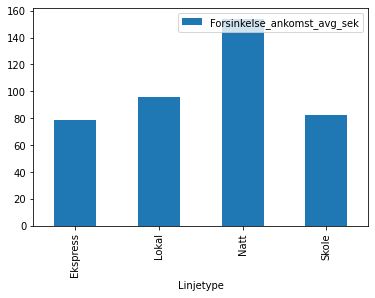

In [16]:
tidsbruklinjetype_gruppert.plot.bar()

In [17]:
tidsbruklinjetype_gruppert = tidsbruklinjetype_gruppert.drop(index='Natt')

<AxesSubplot:xlabel='Linjetype'>

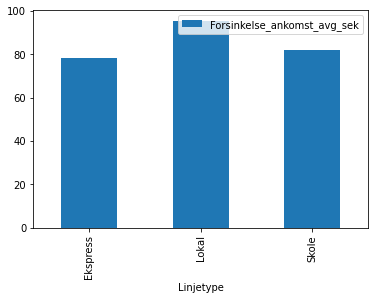

In [18]:
tidsbruklinjetype_gruppert.plot.bar()